In [12]:
#import required packages

import os
import numpy as np
import pandas as pd
import math


from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split


In [41]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv('big mart train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [14]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [15]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)

In [17]:
for cols in df.columns :
    if df[cols].dtype == 'object':
        df[cols]=df[cols].astype('category')

In [18]:
df.dtypes

Item_Weight                   float64
Item_Fat_Content             category
Item_Visibility               float64
Item_Type                    category
Item_MRP                      float64
Outlet_Establishment_Year       int64
Outlet_Size                  category
Outlet_Location_Type         category
Outlet_Type                  category
Item_Outlet_Sales             float64
dtype: object

In [19]:
cat_attr = df.select_dtypes('category').columns
cat_attr

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [20]:
df = pd.get_dummies(columns=cat_attr,data=df,drop_first=True)
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,1,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [21]:
df.dtypes

Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year            int64
Item_Outlet_Sales                  float64
Item_Fat_Content_Low Fat             uint8
Item_Fat_Content_Regular             uint8
Item_Fat_Content_low fat             uint8
Item_Fat_Content_reg                 uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_Others                     uint8
Item_Type_Seafood                    uint8
Item_Type_Snack Foods                uint8
Item_Type_Soft Drinks                uint8
Item_Type_S

In [22]:
for cols in df.columns :
    if df[cols].dtype == 'uint8':
        df[cols]=df[cols].astype('category')

In [23]:
df.dtypes

Item_Weight                         float64
Item_Visibility                     float64
Item_MRP                            float64
Outlet_Establishment_Year             int64
Item_Outlet_Sales                   float64
Item_Fat_Content_Low Fat           category
Item_Fat_Content_Regular           category
Item_Fat_Content_low fat           category
Item_Fat_Content_reg               category
Item_Type_Breads                   category
Item_Type_Breakfast                category
Item_Type_Canned                   category
Item_Type_Dairy                    category
Item_Type_Frozen Foods             category
Item_Type_Fruits and Vegetables    category
Item_Type_Hard Drinks              category
Item_Type_Health and Hygiene       category
Item_Type_Household                category
Item_Type_Meat                     category
Item_Type_Others                   category
Item_Type_Seafood                  category
Item_Type_Snack Foods              category
Item_Type_Soft Drinks           

#### Train-test split

In [28]:
y=df['Item_Outlet_Sales']
X=df.drop('Item_Outlet_Sales', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=123)  

In [29]:
num_attr=X_train.select_dtypes(['int64','float64']).columns
num_attr

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')

In [30]:
cat_attr = X_train.select_dtypes('category').columns
cat_attr

Index(['Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Fat_Content_low fat', 'Item_Fat_Content_reg', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

#### Imputation for missing values for numeric attributes

In [31]:
imputer = SimpleImputer(strategy='median')
imputer = imputer.fit(X_train[num_attr])

X_train[num_attr] = imputer.transform(X_train[num_attr])
X_test[num_attr] = imputer.transform(X_test[num_attr])

<ipython-input-31-ac535a0fc578>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[num_attr] = imputer.transform(X_train[num_attr])
C:\Users\reshm\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-31-ac535a0fc578>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [32]:
X_train.isnull().sum()

Item_Weight                        0
Item_Visibility                    0
Item_MRP                           0
Outlet_Establishment_Year          0
Item_Fat_Content_Low Fat           0
Item_Fat_Content_Regular           0
Item_Fat_Content_low fat           0
Item_Fat_Content_reg               0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Size_Medium                 0
Outlet_Size_Small                  0
Outlet_Location_Type_Tier 2        0
Outlet_Location_Type_Tier 3        0
O

In [33]:
X_test.isnull().sum()

Item_Weight                        0
Item_Visibility                    0
Item_MRP                           0
Outlet_Establishment_Year          0
Item_Fat_Content_Low Fat           0
Item_Fat_Content_Regular           0
Item_Fat_Content_low fat           0
Item_Fat_Content_reg               0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Size_Medium                 0
Outlet_Size_Small                  0
Outlet_Location_Type_Tier 2        0
Outlet_Location_Type_Tier 3        0
O

#### Imputation for missing values for categoric attributes

In [34]:
imputer_cat = SimpleImputer(strategy='most_frequent')

imputer_cat = imputer.fit(X_train[cat_attr])

X_train[cat_attr] = imputer_cat.transform(X_train[cat_attr])
X_test[cat_attr] = imputer_cat.transform(X_test[cat_attr])

<ipython-input-34-af8be4239580>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[cat_attr] = imputer_cat.transform(X_train[cat_attr])
C:\Users\reshm\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-34-af8be4239580>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [35]:
X_train.isnull().sum()

Item_Weight                        0
Item_Visibility                    0
Item_MRP                           0
Outlet_Establishment_Year          0
Item_Fat_Content_Low Fat           0
Item_Fat_Content_Regular           0
Item_Fat_Content_low fat           0
Item_Fat_Content_reg               0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Size_Medium                 0
Outlet_Size_Small                  0
Outlet_Location_Type_Tier 2        0
Outlet_Location_Type_Tier 3        0
O

In [36]:
X_test.isnull().sum()

Item_Weight                        0
Item_Visibility                    0
Item_MRP                           0
Outlet_Establishment_Year          0
Item_Fat_Content_Low Fat           0
Item_Fat_Content_Regular           0
Item_Fat_Content_low fat           0
Item_Fat_Content_reg               0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Size_Medium                 0
Outlet_Size_Small                  0
Outlet_Location_Type_Tier 2        0
Outlet_Location_Type_Tier 3        0
O

#### Standardizing the numerical attributes numeric attributes

In [38]:

scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(X_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test)
x_test = pd.DataFrame(x_test_scaled)

In [39]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1577.081916397957
RMSE value for k=  2 is: 1376.0516018258347
RMSE value for k=  3 is: 1293.1517210086952
RMSE value for k=  4 is: 1264.1692053996785
RMSE value for k=  5 is: 1244.1528810932518
RMSE value for k=  6 is: 1232.122436542571
RMSE value for k=  7 is: 1219.4342007304895
RMSE value for k=  8 is: 1213.3349944508627
RMSE value for k=  9 is: 1207.1062745452916
RMSE value for k=  10 is: 1212.3476063408928
RMSE value for k=  11 is: 1209.6619411468105
RMSE value for k=  12 is: 1206.605436667536
RMSE value for k=  13 is: 1205.1279262008097
RMSE value for k=  14 is: 1206.08431498628
RMSE value for k=  15 is: 1209.8707178096897
RMSE value for k=  16 is: 1213.7577574131192
RMSE value for k=  17 is: 1218.0650406080078
RMSE value for k=  18 is: 1223.1009469866635
RMSE value for k=  19 is: 1230.6953067994652
RMSE value for k=  20 is: 1238.5102938289162


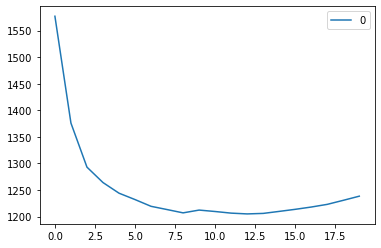

In [40]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
# #reading test 


# test = pd.read_csv('big mart test.csv')


# #preprocessing test dataset
# test.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
# test['Item_Weight'].fillna(mean, inplace =True)
# test = pd.get_dummies(test)
# test_scaled = scaler.fit_transform(test)
# test = pd.DataFrame(test_scaled)

# #predicting on the test set and creating submission file
# predict = model.predict(test)

# predict.to_csv('name.csv',index=False)
